In [28]:
# 데이터 가져오기
from sklearn.datasets import load_diabetes

diabetes_data = load_diabetes()

df_X = diabetes_data.data
df_y = diabetes_data.target

In [29]:
# 모델에 입력할 데이터 X 준비하기
import numpy as np

X = np.array(df_X)
print(X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [12]:
# 모델에 예측할 데이터 y 준비하기
y = np.array(df_y)
print(y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [31]:
# train 데이터와 test 데이터로 분리하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# 모델 준비하기
for i, feature_name in enumerate(diabetes.feature_names) :
    print(f'feature {i+1} : {feature_name}')
    
df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
print(df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']].head())

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  


In [33]:
# 손실함수 loss 정의하기
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def MSE(a, b):
    mse = ((a-b)**2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [34]:
# 기울기를 구하는 gradient 함수 구현하기
def gradient(X, W, b, y):
    N = len(y)
    
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    
    db = 2 * (y_pred - y).mean()
    return dW, db

In [60]:
# 하이퍼 파라미터인 학습률 설정하기
LEARNING_RATE = 0.01

Iteration 10 : Loss 3571.7273
Iteration 20 : Loss 3570.8341
Iteration 30 : Loss 3569.9427
Iteration 40 : Loss 3569.0531
Iteration 50 : Loss 3568.1652
Iteration 60 : Loss 3567.2790
Iteration 70 : Loss 3566.3946
Iteration 80 : Loss 3565.5119
Iteration 90 : Loss 3564.6310
Iteration 100 : Loss 3563.7518
Iteration 110 : Loss 3562.8743
Iteration 120 : Loss 3561.9985
Iteration 130 : Loss 3561.1244
Iteration 140 : Loss 3560.2520
Iteration 150 : Loss 3559.3814
Iteration 160 : Loss 3558.5124
Iteration 170 : Loss 3557.6451
Iteration 180 : Loss 3556.7796
Iteration 190 : Loss 3555.9157
Iteration 200 : Loss 3555.0535
Iteration 210 : Loss 3554.1929
Iteration 220 : Loss 3553.3340
Iteration 230 : Loss 3552.4768
Iteration 240 : Loss 3551.6213
Iteration 250 : Loss 3550.7674
Iteration 260 : Loss 3549.9151
Iteration 270 : Loss 3549.0645
Iteration 280 : Loss 3548.2156
Iteration 290 : Loss 3547.3683
Iteration 300 : Loss 3546.5226
Iteration 310 : Loss 3545.6785
Iteration 320 : Loss 3544.8361
Iteration 330 : L

Iteration 2730 : Loss 3380.4800
Iteration 2740 : Loss 3379.9286
Iteration 2750 : Loss 3379.3781
Iteration 2760 : Loss 3378.8284
Iteration 2770 : Loss 3378.2796
Iteration 2780 : Loss 3377.7317
Iteration 2790 : Loss 3377.1847
Iteration 2800 : Loss 3376.6385
Iteration 2810 : Loss 3376.0932
Iteration 2820 : Loss 3375.5488
Iteration 2830 : Loss 3375.0052
Iteration 2840 : Loss 3374.4625
Iteration 2850 : Loss 3373.9206
Iteration 2860 : Loss 3373.3796
Iteration 2870 : Loss 3372.8395
Iteration 2880 : Loss 3372.3001
Iteration 2890 : Loss 3371.7617
Iteration 2900 : Loss 3371.2241
Iteration 2910 : Loss 3370.6873
Iteration 2920 : Loss 3370.1514
Iteration 2930 : Loss 3369.6163
Iteration 2940 : Loss 3369.0820
Iteration 2950 : Loss 3368.5486
Iteration 2960 : Loss 3368.0160
Iteration 2970 : Loss 3367.4843
Iteration 2980 : Loss 3366.9533
Iteration 2990 : Loss 3366.4233
Iteration 3000 : Loss 3365.8940
Iteration 3010 : Loss 3365.3655
Iteration 3020 : Loss 3364.8379
Iteration 3030 : Loss 3364.3111
Iteratio

Iteration 6250 : Loss 3228.8787
Iteration 6260 : Loss 3228.5433
Iteration 6270 : Loss 3228.2083
Iteration 6280 : Loss 3227.8737
Iteration 6290 : Loss 3227.5395
Iteration 6300 : Loss 3227.2058
Iteration 6310 : Loss 3226.8724
Iteration 6320 : Loss 3226.5395
Iteration 6330 : Loss 3226.2070
Iteration 6340 : Loss 3225.8750
Iteration 6350 : Loss 3225.5433
Iteration 6360 : Loss 3225.2121
Iteration 6370 : Loss 3224.8813
Iteration 6380 : Loss 3224.5509
Iteration 6390 : Loss 3224.2209
Iteration 6400 : Loss 3223.8913
Iteration 6410 : Loss 3223.5622
Iteration 6420 : Loss 3223.2334
Iteration 6430 : Loss 3222.9051
Iteration 6440 : Loss 3222.5772
Iteration 6450 : Loss 3222.2497
Iteration 6460 : Loss 3221.9226
Iteration 6470 : Loss 3221.5959
Iteration 6480 : Loss 3221.2696
Iteration 6490 : Loss 3220.9437
Iteration 6500 : Loss 3220.6182
Iteration 6510 : Loss 3220.2932
Iteration 6520 : Loss 3219.9685
Iteration 6530 : Loss 3219.6442
Iteration 6540 : Loss 3219.3204
Iteration 6550 : Loss 3218.9969
Iteratio

Iteration 9930 : Loss 3128.9815
Iteration 9940 : Loss 3128.7631
Iteration 9950 : Loss 3128.5449
Iteration 9960 : Loss 3128.3269
Iteration 9970 : Loss 3128.1092
Iteration 9980 : Loss 3127.8917
Iteration 9990 : Loss 3127.6745
Iteration 10000 : Loss 3127.4575


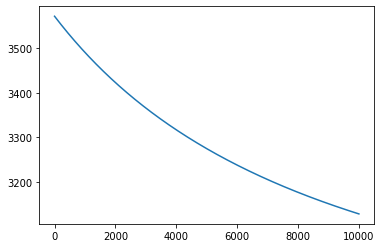

In [65]:
# 모델 학습하기
losses = []

for i in range (1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i,L))

import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [66]:
# test 데이터에 대한 성능 확인하기
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(mse)

2921.263941405669


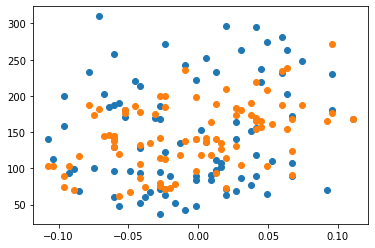

In [67]:
# 정답 데이터와 예측한 데이터 시각화하기
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()